# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2019.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_8606/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.224390,2.071854,-0.042439,0.168537,-0.941463,2.297463,5.995610,7.382927,-0.620000,2.310732,...,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.125422,1.119577,0.780389,0.583474,0.714443,0.926225,2.084309,2.041062,1.275808,0.951460,...,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.930000,1.770000,-0.190000,-0.030000,-1.510000,2.050000,4.100000,5.800000,-1.400000,1.700000,...,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.510000,2.410000,0.060000,0.310000,-0.680000,2.570000,6.300000,7.500000,-0.500000,2.400000,...,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.980000,2.800000,0.370000,0.530000,-0.360000,2.930000,7.300000,8.700000,0.300000,3.000000,...,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


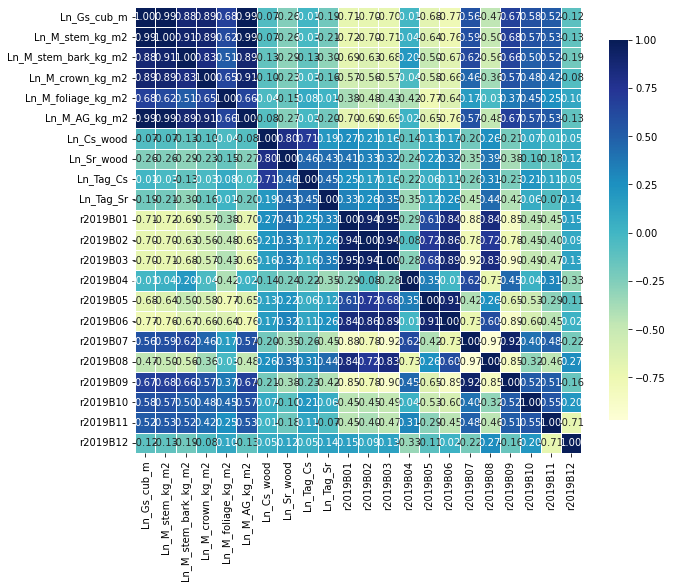

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
y = pd.DataFrame(select, columns= ['Ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B02,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12,Random1,Random2,Random3,Random4,Random5
0,0.025483,0.040910,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937,8.671301,12.322831,8.352693,10.665921,12.766605
1,0.024075,0.038164,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920,11.099508,7.540213,10.755682,10.689937,11.760680
2,0.022492,0.038968,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177,8.034816,9.795391,8.267077,8.512367,13.779434
3,0.023742,0.037811,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390,10.716622,5.535101,9.986993,10.844025,13.856173
4,0.022916,0.037557,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430,13.691516,9.687096,11.509484,9.276162,11.910708


In [11]:
# Columns in "y" data collections
y.head()

,Ln_Tag_Sr
0,2.6
1,2.9
2,2.9
3,2.7
4,2.8


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.2470494659485476, 0.16911195780286747, -0.027545384310797782]
    Mean: -0.035
    Std: 0.170

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.01750088 0.90245514 0.98129968]
    Mean: 0.967
    Std: 0.048

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8143111272134642, 0.6676507939310634, 0.8090424301869727]
    Mean: 0.764
    Std: 0.068

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.132 (std: 0.278)
Parameters: {'colsample_bytree': 0.866923632873004, 'gamma': 0.19050450985689993, 'learning_rate': 0.03003094614045604, 'max_depth': 2, 'n_estimators': 132, 'subsample': 0.3897579328003368}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.24714341, 0.25965667, 0.20252161, 0.11889815, 0.28802176,
       0.25089812, 0.25528088, 0.30926404, 0.28106198, 0.11932268,
       0.18756742, 0.34540739, 0.26177993, 0.09845161, 0.10884013,
       0.1168324 , 0.13099794, 0.1783731 , 0.34479489, 0.3257515 ,
       0.14803042, 0.31138048, 0.37708187, 0.13260641, 0.13880363,
       0.36479373, 0.26935091, 0.15001221, 0.16525927, 0.1849709 ]), 'std_fit_time': array([0.04463927, 0.0132096 , 0.01203755, 0.00832297, 0.01352012,
       0.0020607 , 0.01436124, 0.01084282, 0.01440874, 0.03149475,
       0.00632195, 0.01279369, 0.01157813, 0.00241125, 0.01463294,
       0.00584053, 0.00349379, 0.00516222, 0.01457065, 0.01312298,
       0.00482437, 0.00936382, 0.01865406, 0.00570023, 0.0017564 ,
       0.03585305, 0.01146901, 0.00335015, 0.00490822, 0.00678507]), 'mean_score_time': array([0.00496078, 0.00481148, 0.00485792, 0.00492258, 0.00480709,
       0.0049974 , 0.00487094, 0.00478325, 0.00475669, 0.00457458,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.866923632873004
Gamma: 0.19050450985689993
Learning_rate: 0.03003094614045604
Max_depth: 2
N_estimators: 132
Subsample: 0.3897579328003368


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.01693	validation_1-rmse:1.91576
[1]	validation_0-rmse:1.97065	validation_1-rmse:1.87239
[2]	validation_0-rmse:1.92648	validation_1-rmse:1.83579
[3]	validation_0-rmse:1.87865	validation_1-rmse:1.79638
[4]	validation_0-rmse:1.83206	validation_1-rmse:1.75306
[5]	validation_0-rmse:1.78789	validation_1-rmse:1.71053
[6]	validation_0-rmse:1.75022	validation_1-rmse:1.68016
[7]	validation_0-rmse:1.70986	validation_1-rmse:1.64155
[8]	validation_0-rmse:1.66890	validation_1-rmse:1.60383
[9]	validation_0-rmse:1.62937	validation_1-rmse:1.56719
[10]	validation_0-rmse:1.59237	validation_1-rmse:1.52914
[11]	validation_0-rmse:1.55505	validation_1-rmse:1.49396
[12]	validation_0-rmse:1.51936	validation_1-rmse:1.46327
[13]	validation_0-rmse:1.48405	validation_1-rmse:1.43100
[14]	validation_0-rmse:1.44862	validation_1-rmse:1.40071
[15]	validation_0-rmse:1.41971	validation_1-rmse:1.37610


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:1.39095	validation_1-rmse:1.34796
[17]	validation_0-rmse:1.36196	validation_1-rmse:1.31988
[18]	validation_0-rmse:1.33452	validation_1-rmse:1.29603
[19]	validation_0-rmse:1.30774	validation_1-rmse:1.27172
[20]	validation_0-rmse:1.28211	validation_1-rmse:1.25116
[21]	validation_0-rmse:1.25735	validation_1-rmse:1.22959
[22]	validation_0-rmse:1.23354	validation_1-rmse:1.21072
[23]	validation_0-rmse:1.21000	validation_1-rmse:1.19151
[24]	validation_0-rmse:1.19023	validation_1-rmse:1.17471
[25]	validation_0-rmse:1.16901	validation_1-rmse:1.15581
[26]	validation_0-rmse:1.15092	validation_1-rmse:1.13914
[27]	validation_0-rmse:1.13405	validation_1-rmse:1.12330
[28]	validation_0-rmse:1.11327	validation_1-rmse:1.10640
[29]	validation_0-rmse:1.09529	validation_1-rmse:1.09256
[30]	validation_0-rmse:1.07723	validation_1-rmse:1.07752
[31]	validation_0-rmse:1.06107	validation_1-rmse:1.06273
[32]	validation_0-rmse:1.04230	validation_1-rmse:1.04750
[33]	validation_0-rmse:1.02736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.38465	validation_1-rmse:1.53968
[16]	validation_0-rmse:1.35728	validation_1-rmse:1.51108
[17]	validation_0-rmse:1.32880	validation_1-rmse:1.48209
[18]	validation_0-rmse:1.30134	validation_1-rmse:1.45398
[19]	validation_0-rmse:1.27428	validation_1-rmse:1.42740
[20]	validation_0-rmse:1.25056	validation_1-rmse:1.40413
[21]	validation_0-rmse:1.22840	validation_1-rmse:1.38169
[22]	validation_0-rmse:1.20305	validation_1-rmse:1.35776
[23]	validation_0-rmse:1.17875	validation_1-rmse:1.33586
[24]	validation_0-rmse:1.15579	validation_1-rmse:1.31452
[25]	validation_0-rmse:1.13356	validation_1-rmse:1.29309
[26]	validation_0-rmse:1.11554	validation_1-rmse:1.27600
[27]	validation_0-rmse:1.09523	validation_1-rmse:1.25831
[28]	validation_0-rmse:1.08027	validation_1-rmse:1.24248
[29]	validation_0-rmse:1.06501	validation_1-rmse:1.22948
[30]	validation_0-rmse:1.04667	validation_1-rmse:1.21066
[31]	validation_0-rmse:1.02986	validation_1-rmse:1.19621
[32]	validation_0-rmse:1.01374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.41817	validation_1-rmse:1.44821
[16]	validation_0-rmse:1.38748	validation_1-rmse:1.42173
[17]	validation_0-rmse:1.35934	validation_1-rmse:1.40156
[18]	validation_0-rmse:1.32889	validation_1-rmse:1.37732
[19]	validation_0-rmse:1.30171	validation_1-rmse:1.35491
[20]	validation_0-rmse:1.27828	validation_1-rmse:1.33049
[21]	validation_0-rmse:1.25428	validation_1-rmse:1.30998
[22]	validation_0-rmse:1.22865	validation_1-rmse:1.28946
[23]	validation_0-rmse:1.20351	validation_1-rmse:1.26964
[24]	validation_0-rmse:1.18056	validation_1-rmse:1.25148
[25]	validation_0-rmse:1.15707	validation_1-rmse:1.23255
[26]	validation_0-rmse:1.13712	validation_1-rmse:1.22165
[27]	validation_0-rmse:1.11815	validation_1-rmse:1.20497
[28]	validation_0-rmse:1.09971	validation_1-rmse:1.19217
[29]	validation_0-rmse:1.08352	validation_1-rmse:1.18073
[30]	validation_0-rmse:1.06374	validation_1-rmse:1.16623
[31]	validation_0-rmse:1.04585	validation_1-rmse:1.15136
[32]	validation_0-rmse:1.02949	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.18083	validation_1-rmse:0.97873
[27]	validation_0-rmse:1.16056	validation_1-rmse:0.96428
[28]	validation_0-rmse:1.14263	validation_1-rmse:0.94908
[29]	validation_0-rmse:1.12640	validation_1-rmse:0.93670
[30]	validation_0-rmse:1.10759	validation_1-rmse:0.92230
[31]	validation_0-rmse:1.08960	validation_1-rmse:0.91106
[32]	validation_0-rmse:1.07213	validation_1-rmse:0.89844
[33]	validation_0-rmse:1.05453	validation_1-rmse:0.88537
[34]	validation_0-rmse:1.04125	validation_1-rmse:0.87562
[35]	validation_0-rmse:1.03172	validation_1-rmse:0.86583
[36]	validation_0-rmse:1.01708	validation_1-rmse:0.85407
[37]	validation_0-rmse:1.00043	validation_1-rmse:0.84687
[38]	validation_0-rmse:0.98469	validation_1-rmse:0.83817
[39]	validation_0-rmse:0.97117	validation_1-rmse:0.83193
[40]	validation_0-rmse:0.95927	validation_1-rmse:0.82534
[41]	validation_0-rmse:0.94946	validation_1-rmse:0.82274
[42]	validation_0-rmse:0.93955	validation_1-rmse:0.81651
[43]	validation_0-rmse:0.92992	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.09093	validation_1-rmse:1.39388
[28]	validation_0-rmse:1.07515	validation_1-rmse:1.37579
[29]	validation_0-rmse:1.05837	validation_1-rmse:1.35490
[30]	validation_0-rmse:1.04434	validation_1-rmse:1.33626
[31]	validation_0-rmse:1.02634	validation_1-rmse:1.31536
[32]	validation_0-rmse:1.01140	validation_1-rmse:1.29717
[33]	validation_0-rmse:0.99535	validation_1-rmse:1.27635
[34]	validation_0-rmse:0.98273	validation_1-rmse:1.26523
[35]	validation_0-rmse:0.96564	validation_1-rmse:1.24352
[36]	validation_0-rmse:0.95358	validation_1-rmse:1.22781
[37]	validation_0-rmse:0.94273	validation_1-rmse:1.21793
[38]	validation_0-rmse:0.92911	validation_1-rmse:1.20056
[39]	validation_0-rmse:0.91877	validation_1-rmse:1.18941
[40]	validation_0-rmse:0.90599	validation_1-rmse:1.17440
[41]	validation_0-rmse:0.89490	validation_1-rmse:1.16475
[42]	validation_0-rmse:0.88387	validation_1-rmse:1.15348
[43]	validation_0-rmse:0.87228	validation_1-rmse:1.13749
[44]	validation_0-rmse:0.86445	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.17418	validation_1-rmse:1.21230
[25]	validation_0-rmse:1.15001	validation_1-rmse:1.19929
[26]	validation_0-rmse:1.12719	validation_1-rmse:1.18348
[27]	validation_0-rmse:1.10396	validation_1-rmse:1.16598
[28]	validation_0-rmse:1.08463	validation_1-rmse:1.15522
[29]	validation_0-rmse:1.06722	validation_1-rmse:1.14333
[30]	validation_0-rmse:1.04970	validation_1-rmse:1.13321
[31]	validation_0-rmse:1.03218	validation_1-rmse:1.11905
[32]	validation_0-rmse:1.01622	validation_1-rmse:1.11172
[33]	validation_0-rmse:1.00121	validation_1-rmse:1.09997
[34]	validation_0-rmse:0.98613	validation_1-rmse:1.09105
[35]	validation_0-rmse:0.96878	validation_1-rmse:1.07895
[36]	validation_0-rmse:0.95384	validation_1-rmse:1.06922
[37]	validation_0-rmse:0.94185	validation_1-rmse:1.06014
[38]	validation_0-rmse:0.92684	validation_1-rmse:1.05114
[39]	validation_0-rmse:0.91444	validation_1-rmse:1.04282
[40]	validation_0-rmse:0.90101	validation_1-rmse:1.03649
[41]	validation_0-rmse:0.88957	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.11267	validation_1-rmse:1.15312
[28]	validation_0-rmse:1.09155	validation_1-rmse:1.13660
[29]	validation_0-rmse:1.07100	validation_1-rmse:1.11900
[30]	validation_0-rmse:1.05300	validation_1-rmse:1.10928
[31]	validation_0-rmse:1.03545	validation_1-rmse:1.09774
[32]	validation_0-rmse:1.01740	validation_1-rmse:1.08821
[33]	validation_0-rmse:1.00070	validation_1-rmse:1.07776
[34]	validation_0-rmse:0.98396	validation_1-rmse:1.06630
[35]	validation_0-rmse:0.97209	validation_1-rmse:1.05851
[36]	validation_0-rmse:0.95801	validation_1-rmse:1.04868
[37]	validation_0-rmse:0.94214	validation_1-rmse:1.03642
[38]	validation_0-rmse:0.92950	validation_1-rmse:1.02716
[39]	validation_0-rmse:0.91855	validation_1-rmse:1.01833
[40]	validation_0-rmse:0.90697	validation_1-rmse:1.00806
[41]	validation_0-rmse:0.89465	validation_1-rmse:0.99913
[42]	validation_0-rmse:0.88458	validation_1-rmse:0.99419
[43]	validation_0-rmse:0.87308	validation_1-rmse:0.98749
[44]	validation_0-rmse:0.86353	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.16056	validation_1-rmse:1.12199
[25]	validation_0-rmse:1.13913	validation_1-rmse:1.10829
[26]	validation_0-rmse:1.11774	validation_1-rmse:1.09727
[27]	validation_0-rmse:1.09750	validation_1-rmse:1.08680
[28]	validation_0-rmse:1.07955	validation_1-rmse:1.07773
[29]	validation_0-rmse:1.05965	validation_1-rmse:1.06606
[30]	validation_0-rmse:1.04115	validation_1-rmse:1.05615
[31]	validation_0-rmse:1.02383	validation_1-rmse:1.04920
[32]	validation_0-rmse:1.00943	validation_1-rmse:1.04167
[33]	validation_0-rmse:0.99086	validation_1-rmse:1.03403
[34]	validation_0-rmse:0.97230	validation_1-rmse:1.02633
[35]	validation_0-rmse:0.95606	validation_1-rmse:1.01859
[36]	validation_0-rmse:0.94245	validation_1-rmse:1.00941
[37]	validation_0-rmse:0.92850	validation_1-rmse:1.00135
[38]	validation_0-rmse:0.91391	validation_1-rmse:0.99448
[39]	validation_0-rmse:0.90103	validation_1-rmse:0.98906
[40]	validation_0-rmse:0.88505	validation_1-rmse:0.98654
[41]	validation_0-rmse:0.87183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.34088	validation_1-rmse:1.34902
[18]	validation_0-rmse:1.31119	validation_1-rmse:1.32424
[19]	validation_0-rmse:1.28612	validation_1-rmse:1.30125
[20]	validation_0-rmse:1.26241	validation_1-rmse:1.28196
[21]	validation_0-rmse:1.23832	validation_1-rmse:1.25693
[22]	validation_0-rmse:1.21303	validation_1-rmse:1.23704
[23]	validation_0-rmse:1.18984	validation_1-rmse:1.21529
[24]	validation_0-rmse:1.17085	validation_1-rmse:1.19764
[25]	validation_0-rmse:1.14877	validation_1-rmse:1.18003
[26]	validation_0-rmse:1.12658	validation_1-rmse:1.16335
[27]	validation_0-rmse:1.10614	validation_1-rmse:1.14867
[28]	validation_0-rmse:1.08818	validation_1-rmse:1.13390
[29]	validation_0-rmse:1.06905	validation_1-rmse:1.11816
[30]	validation_0-rmse:1.04935	validation_1-rmse:1.09974
[31]	validation_0-rmse:1.03305	validation_1-rmse:1.08339
[32]	validation_0-rmse:1.01467	validation_1-rmse:1.07062
[33]	validation_0-rmse:0.99694	validation_1-rmse:1.05525
[34]	validation_0-rmse:0.98132	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.09015	validation_1-rmse:1.09276
[29]	validation_0-rmse:1.07165	validation_1-rmse:1.07762
[30]	validation_0-rmse:1.05229	validation_1-rmse:1.06247
[31]	validation_0-rmse:1.03735	validation_1-rmse:1.05081
[32]	validation_0-rmse:1.02098	validation_1-rmse:1.03937
[33]	validation_0-rmse:1.00475	validation_1-rmse:1.03005
[34]	validation_0-rmse:0.99088	validation_1-rmse:1.02043
[35]	validation_0-rmse:0.97706	validation_1-rmse:1.00974
[36]	validation_0-rmse:0.96325	validation_1-rmse:0.99942
[37]	validation_0-rmse:0.94969	validation_1-rmse:0.99179
[38]	validation_0-rmse:0.94035	validation_1-rmse:0.98612
[39]	validation_0-rmse:0.92791	validation_1-rmse:0.97823
[40]	validation_0-rmse:0.91423	validation_1-rmse:0.96582
[41]	validation_0-rmse:0.90330	validation_1-rmse:0.95869
[42]	validation_0-rmse:0.89436	validation_1-rmse:0.95262
[43]	validation_0-rmse:0.88367	validation_1-rmse:0.94759
[44]	validation_0-rmse:0.87474	validation_1-rmse:0.94205
[45]	validation_0-rmse:0.86271	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.11215	validation_1-rmse:1.01687
[29]	validation_0-rmse:1.09682	validation_1-rmse:0.99884
[30]	validation_0-rmse:1.07986	validation_1-rmse:0.98403
[31]	validation_0-rmse:1.06247	validation_1-rmse:0.96844
[32]	validation_0-rmse:1.04527	validation_1-rmse:0.95458
[33]	validation_0-rmse:1.03020	validation_1-rmse:0.93687
[34]	validation_0-rmse:1.01824	validation_1-rmse:0.92241
[35]	validation_0-rmse:1.00484	validation_1-rmse:0.90853
[36]	validation_0-rmse:0.99099	validation_1-rmse:0.89747
[37]	validation_0-rmse:0.98039	validation_1-rmse:0.88859
[38]	validation_0-rmse:0.96615	validation_1-rmse:0.87530
[39]	validation_0-rmse:0.95406	validation_1-rmse:0.86448
[40]	validation_0-rmse:0.94159	validation_1-rmse:0.85481
[41]	validation_0-rmse:0.92909	validation_1-rmse:0.84992
[42]	validation_0-rmse:0.92225	validation_1-rmse:0.84539
[43]	validation_0-rmse:0.91208	validation_1-rmse:0.84022
[44]	validation_0-rmse:0.89960	validation_1-rmse:0.83037
[45]	validation_0-rmse:0.88779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.14551	validation_1-rmse:1.11661
[27]	validation_0-rmse:1.12340	validation_1-rmse:1.10089
[28]	validation_0-rmse:1.10383	validation_1-rmse:1.08786
[29]	validation_0-rmse:1.08146	validation_1-rmse:1.07698
[30]	validation_0-rmse:1.06250	validation_1-rmse:1.06420
[31]	validation_0-rmse:1.04315	validation_1-rmse:1.05218
[32]	validation_0-rmse:1.02473	validation_1-rmse:1.04322
[33]	validation_0-rmse:1.00695	validation_1-rmse:1.03338
[34]	validation_0-rmse:0.99105	validation_1-rmse:1.02663
[35]	validation_0-rmse:0.97475	validation_1-rmse:1.01692
[36]	validation_0-rmse:0.95991	validation_1-rmse:1.01070
[37]	validation_0-rmse:0.94739	validation_1-rmse:1.00691
[38]	validation_0-rmse:0.93303	validation_1-rmse:1.00142
[39]	validation_0-rmse:0.92025	validation_1-rmse:0.99540
[40]	validation_0-rmse:0.90921	validation_1-rmse:0.99107
[41]	validation_0-rmse:0.89610	validation_1-rmse:0.98541
[42]	validation_0-rmse:0.88492	validation_1-rmse:0.97936
[43]	validation_0-rmse:0.87332	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:1.05485	validation_1-rmse:1.07609
[32]	validation_0-rmse:1.03856	validation_1-rmse:1.06486
[33]	validation_0-rmse:1.02449	validation_1-rmse:1.05922
[34]	validation_0-rmse:1.00937	validation_1-rmse:1.04919
[35]	validation_0-rmse:0.99799	validation_1-rmse:1.04222
[36]	validation_0-rmse:0.98485	validation_1-rmse:1.03194
[37]	validation_0-rmse:0.96858	validation_1-rmse:1.02104
[38]	validation_0-rmse:0.95621	validation_1-rmse:1.01222
[39]	validation_0-rmse:0.94456	validation_1-rmse:1.00271
[40]	validation_0-rmse:0.93291	validation_1-rmse:0.99327
[41]	validation_0-rmse:0.92073	validation_1-rmse:0.98306
[42]	validation_0-rmse:0.91212	validation_1-rmse:0.97858
[43]	validation_0-rmse:0.89930	validation_1-rmse:0.97293
[44]	validation_0-rmse:0.88978	validation_1-rmse:0.96624
[45]	validation_0-rmse:0.87571	validation_1-rmse:0.95769
[46]	validation_0-rmse:0.86565	validation_1-rmse:0.95189
[47]	validation_0-rmse:0.85626	validation_1-rmse:0.94476
[48]	validation_0-rmse:0.84958	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.10132	validation_1-rmse:1.07360
[29]	validation_0-rmse:1.08215	validation_1-rmse:1.05657
[30]	validation_0-rmse:1.06349	validation_1-rmse:1.03883
[31]	validation_0-rmse:1.04606	validation_1-rmse:1.02415
[32]	validation_0-rmse:1.02675	validation_1-rmse:1.00769
[33]	validation_0-rmse:1.01227	validation_1-rmse:0.99625
[34]	validation_0-rmse:0.99713	validation_1-rmse:0.98725
[35]	validation_0-rmse:0.98128	validation_1-rmse:0.97392
[36]	validation_0-rmse:0.96631	validation_1-rmse:0.96078
[37]	validation_0-rmse:0.95210	validation_1-rmse:0.94937
[38]	validation_0-rmse:0.93770	validation_1-rmse:0.93884
[39]	validation_0-rmse:0.92356	validation_1-rmse:0.93001
[40]	validation_0-rmse:0.91305	validation_1-rmse:0.92173
[41]	validation_0-rmse:0.90037	validation_1-rmse:0.91335
[42]	validation_0-rmse:0.88754	validation_1-rmse:0.90179
[43]	validation_0-rmse:0.87552	validation_1-rmse:0.89301
[44]	validation_0-rmse:0.86710	validation_1-rmse:0.88779
[45]	validation_0-rmse:0.85755	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.09702	validation_1-rmse:1.20956
[29]	validation_0-rmse:1.07977	validation_1-rmse:1.19222
[30]	validation_0-rmse:1.06007	validation_1-rmse:1.17573
[31]	validation_0-rmse:1.04363	validation_1-rmse:1.15859
[32]	validation_0-rmse:1.02832	validation_1-rmse:1.14776
[33]	validation_0-rmse:1.01193	validation_1-rmse:1.13367
[34]	validation_0-rmse:0.99861	validation_1-rmse:1.12320
[35]	validation_0-rmse:0.98390	validation_1-rmse:1.10935
[36]	validation_0-rmse:0.96868	validation_1-rmse:1.09709
[37]	validation_0-rmse:0.95569	validation_1-rmse:1.09096
[38]	validation_0-rmse:0.93939	validation_1-rmse:1.07498
[39]	validation_0-rmse:0.92628	validation_1-rmse:1.06673
[40]	validation_0-rmse:0.91411	validation_1-rmse:1.05718
[41]	validation_0-rmse:0.90041	validation_1-rmse:1.04584
[42]	validation_0-rmse:0.89086	validation_1-rmse:1.03994
[43]	validation_0-rmse:0.88170	validation_1-rmse:1.03644
[44]	validation_0-rmse:0.87400	validation_1-rmse:1.02843
[45]	validation_0-rmse:0.86572	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.16572	validation_1-rmse:1.43354
[25]	validation_0-rmse:1.14377	validation_1-rmse:1.40991
[26]	validation_0-rmse:1.12344	validation_1-rmse:1.39239
[27]	validation_0-rmse:1.10186	validation_1-rmse:1.36873
[28]	validation_0-rmse:1.08151	validation_1-rmse:1.35396
[29]	validation_0-rmse:1.06181	validation_1-rmse:1.33389
[30]	validation_0-rmse:1.04595	validation_1-rmse:1.31462
[31]	validation_0-rmse:1.03202	validation_1-rmse:1.29981
[32]	validation_0-rmse:1.01494	validation_1-rmse:1.28009
[33]	validation_0-rmse:1.00025	validation_1-rmse:1.26922
[34]	validation_0-rmse:0.98860	validation_1-rmse:1.25989
[35]	validation_0-rmse:0.97497	validation_1-rmse:1.24638
[36]	validation_0-rmse:0.96251	validation_1-rmse:1.23581
[37]	validation_0-rmse:0.94938	validation_1-rmse:1.22321
[38]	validation_0-rmse:0.93701	validation_1-rmse:1.21119
[39]	validation_0-rmse:0.92523	validation_1-rmse:1.19648
[40]	validation_0-rmse:0.91252	validation_1-rmse:1.18349
[41]	validation_0-rmse:0.90163	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.15678	validation_1-rmse:0.94853
[28]	validation_0-rmse:1.13793	validation_1-rmse:0.93312
[29]	validation_0-rmse:1.11855	validation_1-rmse:0.91804
[30]	validation_0-rmse:1.09948	validation_1-rmse:0.90134
[31]	validation_0-rmse:1.08187	validation_1-rmse:0.89053
[32]	validation_0-rmse:1.06340	validation_1-rmse:0.87635
[33]	validation_0-rmse:1.04586	validation_1-rmse:0.86339
[34]	validation_0-rmse:1.03175	validation_1-rmse:0.85685
[35]	validation_0-rmse:1.01722	validation_1-rmse:0.84646
[36]	validation_0-rmse:1.00311	validation_1-rmse:0.83530
[37]	validation_0-rmse:0.99003	validation_1-rmse:0.82735
[38]	validation_0-rmse:0.97802	validation_1-rmse:0.82056
[39]	validation_0-rmse:0.96542	validation_1-rmse:0.81145
[40]	validation_0-rmse:0.95368	validation_1-rmse:0.80745
[41]	validation_0-rmse:0.94175	validation_1-rmse:0.80249
[42]	validation_0-rmse:0.93207	validation_1-rmse:0.79668
[43]	validation_0-rmse:0.92091	validation_1-rmse:0.78770
[44]	validation_0-rmse:0.91084	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:1.06605	validation_1-rmse:1.09097
[31]	validation_0-rmse:1.04736	validation_1-rmse:1.06939
[32]	validation_0-rmse:1.02909	validation_1-rmse:1.04962
[33]	validation_0-rmse:1.01307	validation_1-rmse:1.03206
[34]	validation_0-rmse:1.00053	validation_1-rmse:1.01801
[35]	validation_0-rmse:0.98799	validation_1-rmse:1.00241
[36]	validation_0-rmse:0.97191	validation_1-rmse:0.98423
[37]	validation_0-rmse:0.95817	validation_1-rmse:0.96951
[38]	validation_0-rmse:0.94623	validation_1-rmse:0.95729
[39]	validation_0-rmse:0.93500	validation_1-rmse:0.94648
[40]	validation_0-rmse:0.92444	validation_1-rmse:0.93847
[41]	validation_0-rmse:0.91424	validation_1-rmse:0.92932
[42]	validation_0-rmse:0.90481	validation_1-rmse:0.91914
[43]	validation_0-rmse:0.89399	validation_1-rmse:0.90276
[44]	validation_0-rmse:0.88229	validation_1-rmse:0.88974
[45]	validation_0-rmse:0.87460	validation_1-rmse:0.88300
[46]	validation_0-rmse:0.86562	validation_1-rmse:0.87300
[47]	validation_0-rmse:0.86037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.19433	validation_1-rmse:1.17390
[25]	validation_0-rmse:1.17205	validation_1-rmse:1.15526
[26]	validation_0-rmse:1.15346	validation_1-rmse:1.13855
[27]	validation_0-rmse:1.13265	validation_1-rmse:1.12075
[28]	validation_0-rmse:1.11110	validation_1-rmse:1.10113
[29]	validation_0-rmse:1.09168	validation_1-rmse:1.08562
[30]	validation_0-rmse:1.07349	validation_1-rmse:1.07007
[31]	validation_0-rmse:1.05805	validation_1-rmse:1.05635
[32]	validation_0-rmse:1.03952	validation_1-rmse:1.04021
[33]	validation_0-rmse:1.02445	validation_1-rmse:1.02732
[34]	validation_0-rmse:1.00899	validation_1-rmse:1.01612
[35]	validation_0-rmse:0.99699	validation_1-rmse:1.00885
[36]	validation_0-rmse:0.98147	validation_1-rmse:0.99590
[37]	validation_0-rmse:0.96862	validation_1-rmse:0.98538
[38]	validation_0-rmse:0.95336	validation_1-rmse:0.97270
[39]	validation_0-rmse:0.94163	validation_1-rmse:0.96524
[40]	validation_0-rmse:0.92789	validation_1-rmse:0.95477
[41]	validation_0-rmse:0.91714	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.13596	validation_1-rmse:1.34742
[27]	validation_0-rmse:1.11550	validation_1-rmse:1.33115
[28]	validation_0-rmse:1.09766	validation_1-rmse:1.30945
[29]	validation_0-rmse:1.08101	validation_1-rmse:1.29255
[30]	validation_0-rmse:1.06262	validation_1-rmse:1.27219
[31]	validation_0-rmse:1.04782	validation_1-rmse:1.25440
[32]	validation_0-rmse:1.03198	validation_1-rmse:1.23852
[33]	validation_0-rmse:1.01851	validation_1-rmse:1.22412
[34]	validation_0-rmse:1.00493	validation_1-rmse:1.20817
[35]	validation_0-rmse:0.98747	validation_1-rmse:1.18573
[36]	validation_0-rmse:0.97449	validation_1-rmse:1.16837
[37]	validation_0-rmse:0.96553	validation_1-rmse:1.16053
[38]	validation_0-rmse:0.95547	validation_1-rmse:1.14851
[39]	validation_0-rmse:0.94209	validation_1-rmse:1.13298
[40]	validation_0-rmse:0.93127	validation_1-rmse:1.12168
[41]	validation_0-rmse:0.92118	validation_1-rmse:1.11273
[42]	validation_0-rmse:0.91095	validation_1-rmse:1.10352
[43]	validation_0-rmse:0.89994	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.42037	validation_1-rmse:1.58097
[15]	validation_0-rmse:1.38804	validation_1-rmse:1.55081
[16]	validation_0-rmse:1.36163	validation_1-rmse:1.52221
[17]	validation_0-rmse:1.33421	validation_1-rmse:1.49361
[18]	validation_0-rmse:1.30618	validation_1-rmse:1.46402
[19]	validation_0-rmse:1.28182	validation_1-rmse:1.43615
[20]	validation_0-rmse:1.25743	validation_1-rmse:1.41507
[21]	validation_0-rmse:1.23607	validation_1-rmse:1.39296
[22]	validation_0-rmse:1.21163	validation_1-rmse:1.36721
[23]	validation_0-rmse:1.18698	validation_1-rmse:1.34015
[24]	validation_0-rmse:1.16725	validation_1-rmse:1.32226
[25]	validation_0-rmse:1.14461	validation_1-rmse:1.29550
[26]	validation_0-rmse:1.12548	validation_1-rmse:1.27718
[27]	validation_0-rmse:1.10437	validation_1-rmse:1.25724
[28]	validation_0-rmse:1.08595	validation_1-rmse:1.24163
[29]	validation_0-rmse:1.06534	validation_1-rmse:1.21955
[30]	validation_0-rmse:1.04600	validation_1-rmse:1.19824
[31]	validation_0-rmse:1.03047	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.15644	validation_1-rmse:1.27505
[25]	validation_0-rmse:1.13384	validation_1-rmse:1.25384
[26]	validation_0-rmse:1.11641	validation_1-rmse:1.24047
[27]	validation_0-rmse:1.09944	validation_1-rmse:1.22298
[28]	validation_0-rmse:1.07935	validation_1-rmse:1.20254
[29]	validation_0-rmse:1.05830	validation_1-rmse:1.18182
[30]	validation_0-rmse:1.04088	validation_1-rmse:1.16589
[31]	validation_0-rmse:1.02488	validation_1-rmse:1.14928
[32]	validation_0-rmse:1.00867	validation_1-rmse:1.13013
[33]	validation_0-rmse:0.99408	validation_1-rmse:1.11816
[34]	validation_0-rmse:0.98035	validation_1-rmse:1.10593
[35]	validation_0-rmse:0.96755	validation_1-rmse:1.09656
[36]	validation_0-rmse:0.95371	validation_1-rmse:1.08015
[37]	validation_0-rmse:0.94065	validation_1-rmse:1.06802
[38]	validation_0-rmse:0.92943	validation_1-rmse:1.05528
[39]	validation_0-rmse:0.91509	validation_1-rmse:1.04007
[40]	validation_0-rmse:0.90278	validation_1-rmse:1.02880
[41]	validation_0-rmse:0.89102	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.12071	validation_1-rmse:1.12714
[28]	validation_0-rmse:1.09976	validation_1-rmse:1.10825
[29]	validation_0-rmse:1.07997	validation_1-rmse:1.09118
[30]	validation_0-rmse:1.06244	validation_1-rmse:1.07500
[31]	validation_0-rmse:1.04589	validation_1-rmse:1.06140
[32]	validation_0-rmse:1.02955	validation_1-rmse:1.04899
[33]	validation_0-rmse:1.01454	validation_1-rmse:1.03623
[34]	validation_0-rmse:0.99646	validation_1-rmse:1.01914
[35]	validation_0-rmse:0.98695	validation_1-rmse:1.00737
[36]	validation_0-rmse:0.97169	validation_1-rmse:0.99316
[37]	validation_0-rmse:0.95963	validation_1-rmse:0.98621
[38]	validation_0-rmse:0.94641	validation_1-rmse:0.97164
[39]	validation_0-rmse:0.93577	validation_1-rmse:0.95976
[40]	validation_0-rmse:0.92390	validation_1-rmse:0.95007
[41]	validation_0-rmse:0.91038	validation_1-rmse:0.94066
[42]	validation_0-rmse:0.90085	validation_1-rmse:0.93461
[43]	validation_0-rmse:0.88834	validation_1-rmse:0.92445
[44]	validation_0-rmse:0.87906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.16473	validation_1-rmse:1.08926
[27]	validation_0-rmse:1.14320	validation_1-rmse:1.07180
[28]	validation_0-rmse:1.12293	validation_1-rmse:1.04963
[29]	validation_0-rmse:1.09996	validation_1-rmse:1.03322
[30]	validation_0-rmse:1.08195	validation_1-rmse:1.01477
[31]	validation_0-rmse:1.06441	validation_1-rmse:0.99789
[32]	validation_0-rmse:1.04772	validation_1-rmse:0.98174
[33]	validation_0-rmse:1.03218	validation_1-rmse:0.97189
[34]	validation_0-rmse:1.01462	validation_1-rmse:0.95487
[35]	validation_0-rmse:1.00008	validation_1-rmse:0.94435
[36]	validation_0-rmse:0.98520	validation_1-rmse:0.92986
[37]	validation_0-rmse:0.97181	validation_1-rmse:0.91693
[38]	validation_0-rmse:0.96092	validation_1-rmse:0.91223
[39]	validation_0-rmse:0.95220	validation_1-rmse:0.90853
[40]	validation_0-rmse:0.93888	validation_1-rmse:0.89511
[41]	validation_0-rmse:0.93190	validation_1-rmse:0.88605
[42]	validation_0-rmse:0.92081	validation_1-rmse:0.87768
[43]	validation_0-rmse:0.90806	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:1.13185	validation_1-rmse:1.24823
[28]	validation_0-rmse:1.11268	validation_1-rmse:1.22704
[29]	validation_0-rmse:1.09688	validation_1-rmse:1.20928
[30]	validation_0-rmse:1.08063	validation_1-rmse:1.19533
[31]	validation_0-rmse:1.06737	validation_1-rmse:1.18549
[32]	validation_0-rmse:1.04721	validation_1-rmse:1.16436
[33]	validation_0-rmse:1.03153	validation_1-rmse:1.14796
[34]	validation_0-rmse:1.01969	validation_1-rmse:1.13366
[35]	validation_0-rmse:1.00524	validation_1-rmse:1.11621
[36]	validation_0-rmse:0.99214	validation_1-rmse:1.10517
[37]	validation_0-rmse:0.97979	validation_1-rmse:1.09260
[38]	validation_0-rmse:0.96846	validation_1-rmse:1.08138
[39]	validation_0-rmse:0.95409	validation_1-rmse:1.07124
[40]	validation_0-rmse:0.94167	validation_1-rmse:1.06133
[41]	validation_0-rmse:0.93090	validation_1-rmse:1.05219
[42]	validation_0-rmse:0.91903	validation_1-rmse:1.04293
[43]	validation_0-rmse:0.90973	validation_1-rmse:1.03765
[44]	validation_0-rmse:0.89899	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:1.14855	validation_1-rmse:1.22282
[27]	validation_0-rmse:1.12879	validation_1-rmse:1.20151
[28]	validation_0-rmse:1.11039	validation_1-rmse:1.18252
[29]	validation_0-rmse:1.09047	validation_1-rmse:1.16164
[30]	validation_0-rmse:1.07215	validation_1-rmse:1.14117
[31]	validation_0-rmse:1.05822	validation_1-rmse:1.12566
[32]	validation_0-rmse:1.04476	validation_1-rmse:1.11222
[33]	validation_0-rmse:1.03122	validation_1-rmse:1.09502
[34]	validation_0-rmse:1.01756	validation_1-rmse:1.07802
[35]	validation_0-rmse:1.00502	validation_1-rmse:1.06440
[36]	validation_0-rmse:0.98991	validation_1-rmse:1.04850
[37]	validation_0-rmse:0.97804	validation_1-rmse:1.03549
[38]	validation_0-rmse:0.96651	validation_1-rmse:1.02491
[39]	validation_0-rmse:0.95422	validation_1-rmse:1.01467
[40]	validation_0-rmse:0.94196	validation_1-rmse:1.00570
[41]	validation_0-rmse:0.92976	validation_1-rmse:0.99524
[42]	validation_0-rmse:0.92043	validation_1-rmse:0.98385
[43]	validation_0-rmse:0.91062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.11992	validation_1-rmse:1.19488
[29]	validation_0-rmse:1.10524	validation_1-rmse:1.18179
[30]	validation_0-rmse:1.08636	validation_1-rmse:1.16167
[31]	validation_0-rmse:1.07305	validation_1-rmse:1.14934
[32]	validation_0-rmse:1.05645	validation_1-rmse:1.13199
[33]	validation_0-rmse:1.04078	validation_1-rmse:1.11726
[34]	validation_0-rmse:1.02422	validation_1-rmse:1.10189
[35]	validation_0-rmse:1.00638	validation_1-rmse:1.08244
[36]	validation_0-rmse:0.99175	validation_1-rmse:1.06712
[37]	validation_0-rmse:0.97631	validation_1-rmse:1.05289
[38]	validation_0-rmse:0.96303	validation_1-rmse:1.04004
[39]	validation_0-rmse:0.95074	validation_1-rmse:1.02938
[40]	validation_0-rmse:0.94046	validation_1-rmse:1.02205
[41]	validation_0-rmse:0.93013	validation_1-rmse:1.00900
[42]	validation_0-rmse:0.92000	validation_1-rmse:0.99883
[43]	validation_0-rmse:0.90982	validation_1-rmse:0.98947
[44]	validation_0-rmse:0.90073	validation_1-rmse:0.97670
[45]	validation_0-rmse:0.89145	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:1.15581	validation_1-rmse:1.32937
[25]	validation_0-rmse:1.13673	validation_1-rmse:1.31148
[26]	validation_0-rmse:1.11634	validation_1-rmse:1.29226
[27]	validation_0-rmse:1.09716	validation_1-rmse:1.27396
[28]	validation_0-rmse:1.07753	validation_1-rmse:1.25855
[29]	validation_0-rmse:1.05742	validation_1-rmse:1.24023
[30]	validation_0-rmse:1.04340	validation_1-rmse:1.22550
[31]	validation_0-rmse:1.02798	validation_1-rmse:1.21086
[32]	validation_0-rmse:1.01182	validation_1-rmse:1.19700
[33]	validation_0-rmse:0.99769	validation_1-rmse:1.18411
[34]	validation_0-rmse:0.98326	validation_1-rmse:1.16994
[35]	validation_0-rmse:0.97173	validation_1-rmse:1.15910
[36]	validation_0-rmse:0.95710	validation_1-rmse:1.14335
[37]	validation_0-rmse:0.94286	validation_1-rmse:1.13197
[38]	validation_0-rmse:0.92865	validation_1-rmse:1.12057
[39]	validation_0-rmse:0.91596	validation_1-rmse:1.10932
[40]	validation_0-rmse:0.90405	validation_1-rmse:1.09768
[41]	validation_0-rmse:0.89294	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.41953	validation_1-rmse:1.44725
[15]	validation_0-rmse:1.39249	validation_1-rmse:1.42139
[16]	validation_0-rmse:1.36358	validation_1-rmse:1.39657
[17]	validation_0-rmse:1.33505	validation_1-rmse:1.37069
[18]	validation_0-rmse:1.30807	validation_1-rmse:1.34863
[19]	validation_0-rmse:1.28222	validation_1-rmse:1.32428
[20]	validation_0-rmse:1.25653	validation_1-rmse:1.30116
[21]	validation_0-rmse:1.23114	validation_1-rmse:1.28340
[22]	validation_0-rmse:1.20639	validation_1-rmse:1.26175
[23]	validation_0-rmse:1.18284	validation_1-rmse:1.24259
[24]	validation_0-rmse:1.16139	validation_1-rmse:1.22378
[25]	validation_0-rmse:1.14177	validation_1-rmse:1.21183
[26]	validation_0-rmse:1.12548	validation_1-rmse:1.19993
[27]	validation_0-rmse:1.10854	validation_1-rmse:1.18512
[28]	validation_0-rmse:1.09168	validation_1-rmse:1.16936
[29]	validation_0-rmse:1.07382	validation_1-rmse:1.15684
[30]	validation_0-rmse:1.05612	validation_1-rmse:1.14187
[31]	validation_0-rmse:1.03962	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:1.07612	validation_1-rmse:1.37156
[29]	validation_0-rmse:1.06014	validation_1-rmse:1.35621
[30]	validation_0-rmse:1.04219	validation_1-rmse:1.34193
[31]	validation_0-rmse:1.02794	validation_1-rmse:1.32793
[32]	validation_0-rmse:1.01196	validation_1-rmse:1.31013
[33]	validation_0-rmse:0.99516	validation_1-rmse:1.29603
[34]	validation_0-rmse:0.97943	validation_1-rmse:1.28329
[35]	validation_0-rmse:0.96597	validation_1-rmse:1.26898
[36]	validation_0-rmse:0.95187	validation_1-rmse:1.25637
[37]	validation_0-rmse:0.93554	validation_1-rmse:1.24348
[38]	validation_0-rmse:0.92295	validation_1-rmse:1.22608
[39]	validation_0-rmse:0.91121	validation_1-rmse:1.21429
[40]	validation_0-rmse:0.89940	validation_1-rmse:1.20225
[41]	validation_0-rmse:0.88690	validation_1-rmse:1.19408
[42]	validation_0-rmse:0.87518	validation_1-rmse:1.18676
[43]	validation_0-rmse:0.86366	validation_1-rmse:1.17579
[44]	validation_0-rmse:0.85457	validation_1-rmse:1.16643
[45]	validation_0-rmse:0.84642	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 109.467, median: 116.0,
 pred. interval (P(0.025)-P(0.975)): 69.35-131.0, 
 conf. interval (p-value=0.95): 107.492-120.685 
***
Aggregate bias statistic: 
 mean: -2.842, median: -2.226,
 pred. interval (P(0.025)-P(0.975)): -13.163-3.622, 
 conf. interval (p-value=0.95): -3.631--0.78 
***
Aggregate RMSE statistic: 
 mean: 0.833, median: 0.847, pred. interval (P(0.025)-P(0.975)): 0.685-0.963, 
 conf. interval (p-value=0.95): 0.814-0.866 
***
Aggregate MSE statistic: 
 mean: 0.7, median: 0.718, pred. interval (P(0.025)-P(0.975)): 0.469-0.927, 
 conf. interval (p-value=0.95): 0.665-0.751 
***
Aggregate R^2 statistic: 
 mean: 0.233, median: 0.244, pred. interval (P(0.025)-P(0.975)): 0.046-0.425, 
 conf. interval (p-value=0.95): 0.199-0.279 
***
Aggregate bias(%) statistic: 
 mean: -1.147, median: -2.226, pred. interval (P(0.025)-P(0.975)): -5.224-1.647, 
 conf. interval (p-value=0.95): -1.592--0.348 
***
Aggregate RMSE(%) statistic: 

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.99721
[1]	validation_0-rmse:1.95056
[2]	validation_0-rmse:1.90092
[3]	validation_0-rmse:1.85619
[4]	validation_0-rmse:1.81311
[5]	validation_0-rmse:1.77188
[6]	validation_0-rmse:1.73002
[7]	validation_0-rmse:1.68962
[8]	validation_0-rmse:1.64889
[9]	validation_0-rmse:1.61094
[10]	validation_0-rmse:1.57671
[11]	validation_0-rmse:1.54143
[12]	validation_0-rmse:1.50989
[13]	validation_0-rmse:1.47976
[14]	validation_0-rmse:1.44677
[15]	validation_0-rmse:1.41541
[16]	validation_0-rmse:1.38706


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.35887
[18]	validation_0-rmse:1.33215
[19]	validation_0-rmse:1.30456
[20]	validation_0-rmse:1.28110
[21]	validation_0-rmse:1.25768
[22]	validation_0-rmse:1.23234
[23]	validation_0-rmse:1.20825
[24]	validation_0-rmse:1.18420
[25]	validation_0-rmse:1.16674
[26]	validation_0-rmse:1.14797
[27]	validation_0-rmse:1.12986
[28]	validation_0-rmse:1.10914
[29]	validation_0-rmse:1.09391
[30]	validation_0-rmse:1.08032
[31]	validation_0-rmse:1.06434
[32]	validation_0-rmse:1.05188
[33]	validation_0-rmse:1.03561
[34]	validation_0-rmse:1.02116
[35]	validation_0-rmse:1.00725
[36]	validation_0-rmse:0.99292
[37]	validation_0-rmse:0.98040
[38]	validation_0-rmse:0.96664
[39]	validation_0-rmse:0.95533
[40]	validation_0-rmse:0.94188
[41]	validation_0-rmse:0.93042
[42]	validation_0-rmse:0.91820
[43]	validation_0-rmse:0.90821
[44]	validation_0-rmse:0.89649
[45]	validation_0-rmse:0.88882
[46]	validation_0-rmse:0.87973
[47]	validation_0-rmse:0.87275
[48]	validation_0-rmse:0.86404
[49]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 131


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

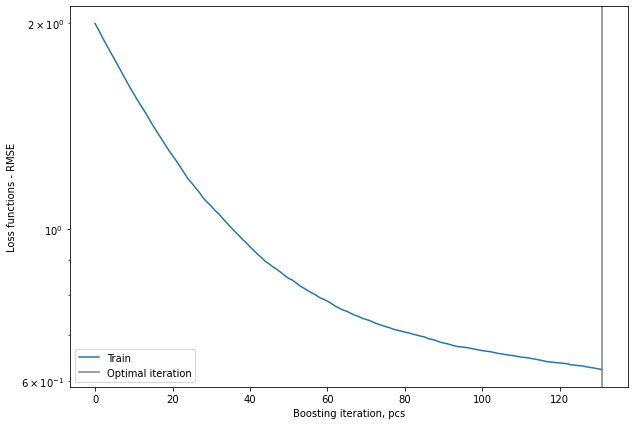

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -4.29
RMSE: 0.6
Relative RMSE(%):  0.270
MSE: 0.4
R square: 56.9%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.220
a1: 0.451
R^2: 0.615
Uncertainty
a0: 1.22+/-0.06
a1: 0.451+/-0.025


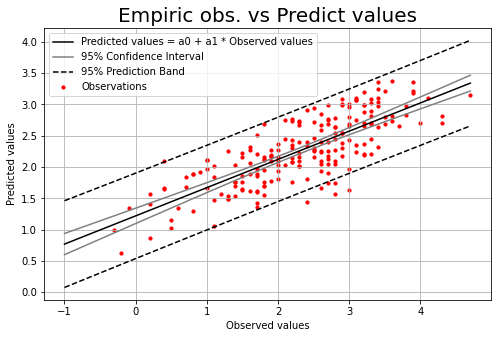

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

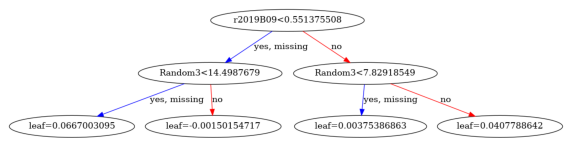

In [38]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

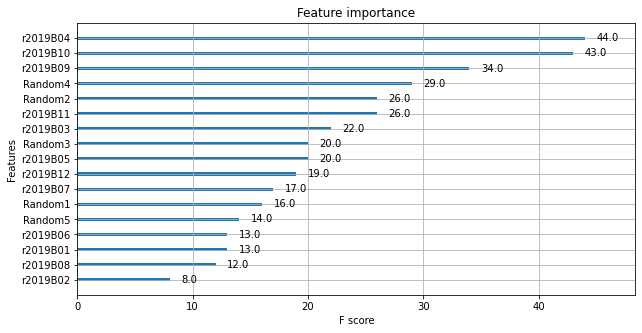

In [40]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

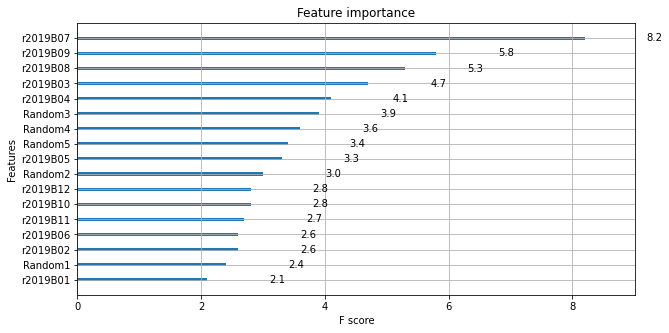

In [36]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

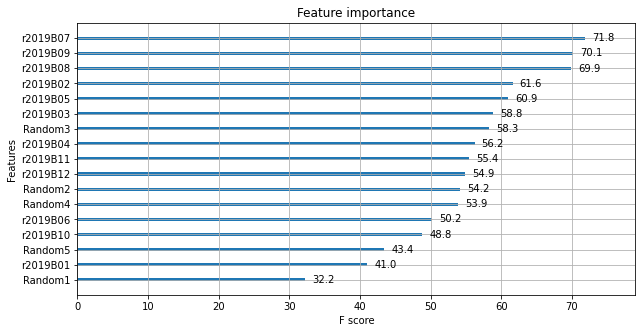

In [37]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


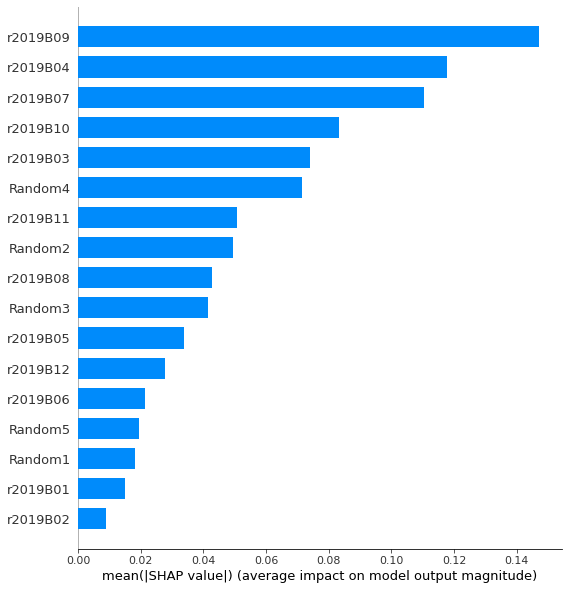

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

In [ ]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_.txt")